## Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Data Collection

In [2]:
data = pd.read_csv('Data/Real-Data/Real_Combine.csv')

# Reading first 5 rows
data.head()

T    TM   Tm     SLP     H   VV    V    VM      PM 2.5
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4  219.720833
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1  154.037500
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2  200.645833

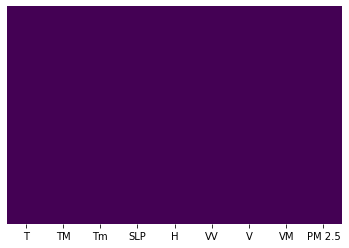

In [3]:
data.isnull().sum()

# if we have minimum null values we can drop null values
data = data.dropna()
# We don`t have null values

# Plotting the Null values
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Dividing the features

In [4]:
X = data.drop(['PM 2.5'], axis=1) # Droping the Target Variable i.e. PM 2.5
Y = pd.DataFrame(data['PM 2.5']) # Assigning the Target Vatiavle to Y

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [5]:
from sklearn.ensemble  import ExtraTreesRegressor

In [6]:
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [7]:
# This is used when we have many features and we have to select top 10 featues from the DataSet
fea_impotance = pd.DataFrame({
                                 'Features': X.columns,
                                 'Feature_Imp' : model.feature_importances_
                                 })
fea_impotance

Features  Feature_Imp
0        T     0.128330
1       TM     0.087239
2       Tm     0.195893
3      SLP     0.150783
4        H     0.082672
5       VV     0.264011
6        V     0.051880
7       VM     0.039193

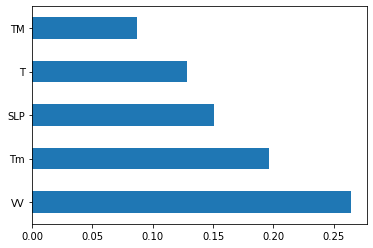

In [8]:
# Plotting the Graph of FEATURE IMPORTANCE for better visualisation
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(5).plot(kind='barh')
plt.show()

### Train Test Data Split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7, random_state=0)

### Plotting Target Variable

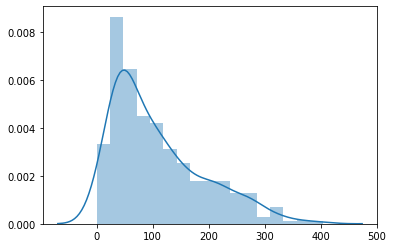

In [10]:
sns.distplot(Y)

## Implementing Desicion Tree Regression

In [11]:
from sklearn.tree import DecisionTreeRegressor

In [12]:
dtree = DecisionTreeRegressor(criterion='mse')

dtree.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [13]:
# Calcu;ating R^2 for Training dataset
dtree_train_score = dtree.score(X_train, Y_train)
print(f'Coefficient of determination R^2 on training Dataset : {dtree_train_score}')

Coefficient of determination R^2 on training Dataset : 1.0


In [14]:
# Calcu;ating R^2 for Testing dataset
dtree_test_score = dtree.score(X_test, Y_test)
print(f'Coefficient of determination R^2 on training Dataset : {dtree_test_score}')

Coefficient of determination R^2 on training Dataset : 0.2645996565369573


From this we can the R^2 value for training dataset is 100%

and R^2 for testing dataset is 24%

i.e. this is a overfitting problem

In [15]:
# Performing cross validation
from sklearn.model_selection import cross_val_score
dtree_cross_val_score = cross_val_score(dtree, X,Y, cv=5)

In [16]:
dtree_cross_val_score.mean()

0.08287373135140204

## Decision Tree Visualisation

In [17]:
from IPython.display import Image
from sklearn.externals.six import StringIO

from sklearn.tree import export_graphviz
import pydotplus

In [18]:
features = list(data.columns[:-1])
features

['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']

In [19]:
# StringIO is generally used for Display Console
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names= features, filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Model Evaluation

In [20]:
prediction = dtree.predict(X_test)

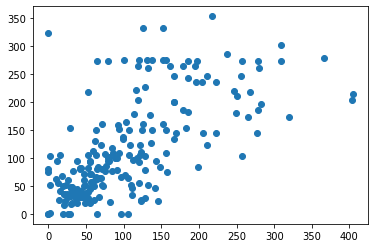

In [21]:
plt.scatter(Y_test,prediction)

### HyperParameter Tuning Decision Tree

In [22]:
# Hyper Parameter Optimization
DecisionTreeRegressor()

# All these parameters are the Parameters of Decision Tree Regressor
params = {
    'splitter': ['best', 'random'], 
    'max_depth': [3,4,5,6,7,8,9,10,11,12,13,14,15,16], 
    'min_samples_leaf' : [1,2,3,4,5],
    'min_weight_fraction_leaf' : [0.1,0.2,0.3,0.4],
    'max_features' : ['auto', 'log2','sqrt',None],
    'max_leaf_nodes': [None,10,20,30,40,50,60,70]
}

In [23]:
# For selecting the best Parameters
from sklearn.model_selection import GridSearchCV

In [24]:
random_search = GridSearchCV(dtree, param_grid= params, scoring='neg_mean_squared_error', n_jobs=-1, cv=10, verbose=3)

In [25]:
### creating a timer
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(),3600)
        tmin, tsec = divmod(temp_sec,60)
        print(f'\nTime Taken: {thour}hours {tmin}minutes {round(tsec,2)} seconds')

In [26]:
from datetime import datetime

start_time = timer(None)
random_search.fit(X,Y)
timer(start_time)

Fitting 10 folds for each of 17920 candidates, totalling 179200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 4880 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 12048 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 21264 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 32528 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 45840 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 61200 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 78608 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 98064 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 119568 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 143120 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 168720 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 179185 out of 179200 | elapsed:  4.4min remaining:    0.0s
[Parall

In [27]:
random_search.best_params_

{'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 5,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'random'}

In [28]:
random_search.best_score_

-3070.99488666122

In [29]:
prediction = random_search.predict(X_test)

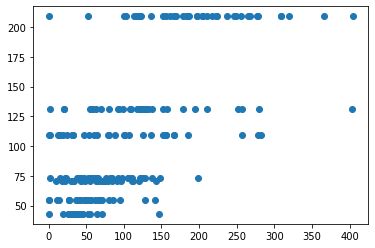

In [30]:
plt.scatter(Y_test,prediction)

In [31]:
# Calculting some of the Errors
from sklearn import metrics

In [32]:
print(f'MAE: {metrics.mean_absolute_error(Y_test,prediction)}')
print(f'MSE: {metrics.mean_squared_error(Y_test,prediction)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(Y_test,prediction))}')

MAE: 43.655241460737145
MSE: 3726.0596967729502
RMSE: 61.0414588355566


### Creating PKL FileFormat for deployment purpose

In [35]:
import pickle

In [36]:
# Open a file 
file = open('regression_decision_tree.pkl', 'wb')

# dump information to that file
pickle.dump(randon_search,file)